<a href="https://colab.research.google.com/github/openstrategist/APAC_LCOE/blob/main/LCOE_APAC_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="dark", palette="ocean")
import matplotlib
!pip install joypy
import joypy as jp

matplotlib.rcParams['figure.figsize'] = (14,8)
%config InlineBackend.figure_format = 'retina'

#set_palette
colors = ["#00a4e3","#0D1540","#06357a", "#adafb2", "#a31c37"]
sns.set_palette(sns.color_palette(colors))

In [6]:
df=pd.read_csv("https://raw.githubusercontent.com/openstrategist/APAC_LCOE/main/APAC%20LCOE%20db.csv")

In [7]:
df.dtypes

AP_Country                    object
AP_ModelZone                  object
Technology                    object
Year                           int64
LCOE (USD)                   float64
LCOE without carbon costs    float64
input_Capital_Cost           float64
input_Capacity_Factor        float64
WACC                         float64
input_Fixed_OM               float64
input_Variable_OM            float64
input_Economic_Life          float64
input_Effective_Tax          float64
input_Equity_Share           float64
input_Cost_of_Equity         float64
input_Debt_Interest_Rate     float64
input_DebtPeriod             float64
Degradation                  float64
Depreciation term            float64
Project Size                 float64
LCOE_component - Capital     float64
LCOE_component - O&M         float64
LCOE_component - Fuel        float64
LCOE_component - Others      float64
LCOE_component - Carbon      float64
LCOE_status                    int64
dtype: object

In [8]:
df.shape

(40760, 26)

In [9]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Year,40760.0,2030.013665,11.827733,2010.0,2020.000000,2030.000000,2040.000000,2050.000000
LCOE (USD),39001.0,91.247041,80.584170,0.0,53.170000,72.300000,103.740000,876.430000
LCOE without carbon costs,39001.0,90.099558,80.759671,0.0,51.250000,70.920000,102.300000,876.430000
input_Capital_Cost,40760.0,1487.881054,1247.016661,0.0,644.210000,1136.165000,1962.270000,7910.610000
input_Capacity_Factor,40760.0,0.319034,0.210024,0.0,0.181298,0.270000,0.400729,0.890000
WACC,40760.0,0.060488,0.024571,0.0,0.047200,0.065125,0.075050,0.147768
input_Fixed_OM,40760.0,24.122125,21.353893,0.0,12.330000,17.150000,30.000000,147.320000
input_Variable_OM,40760.0,2.298176,3.878871,0.0,0.000000,1.800000,3.850000,23.150000
input_Economic_Life,40760.0,29.019190,15.049980,0.0,25.000000,25.000000,30.000000,80.000000
input_Effective_Tax,26323.0,0.250083,0.081911,0.0,0.240000,0.250000,0.300000,0.410000


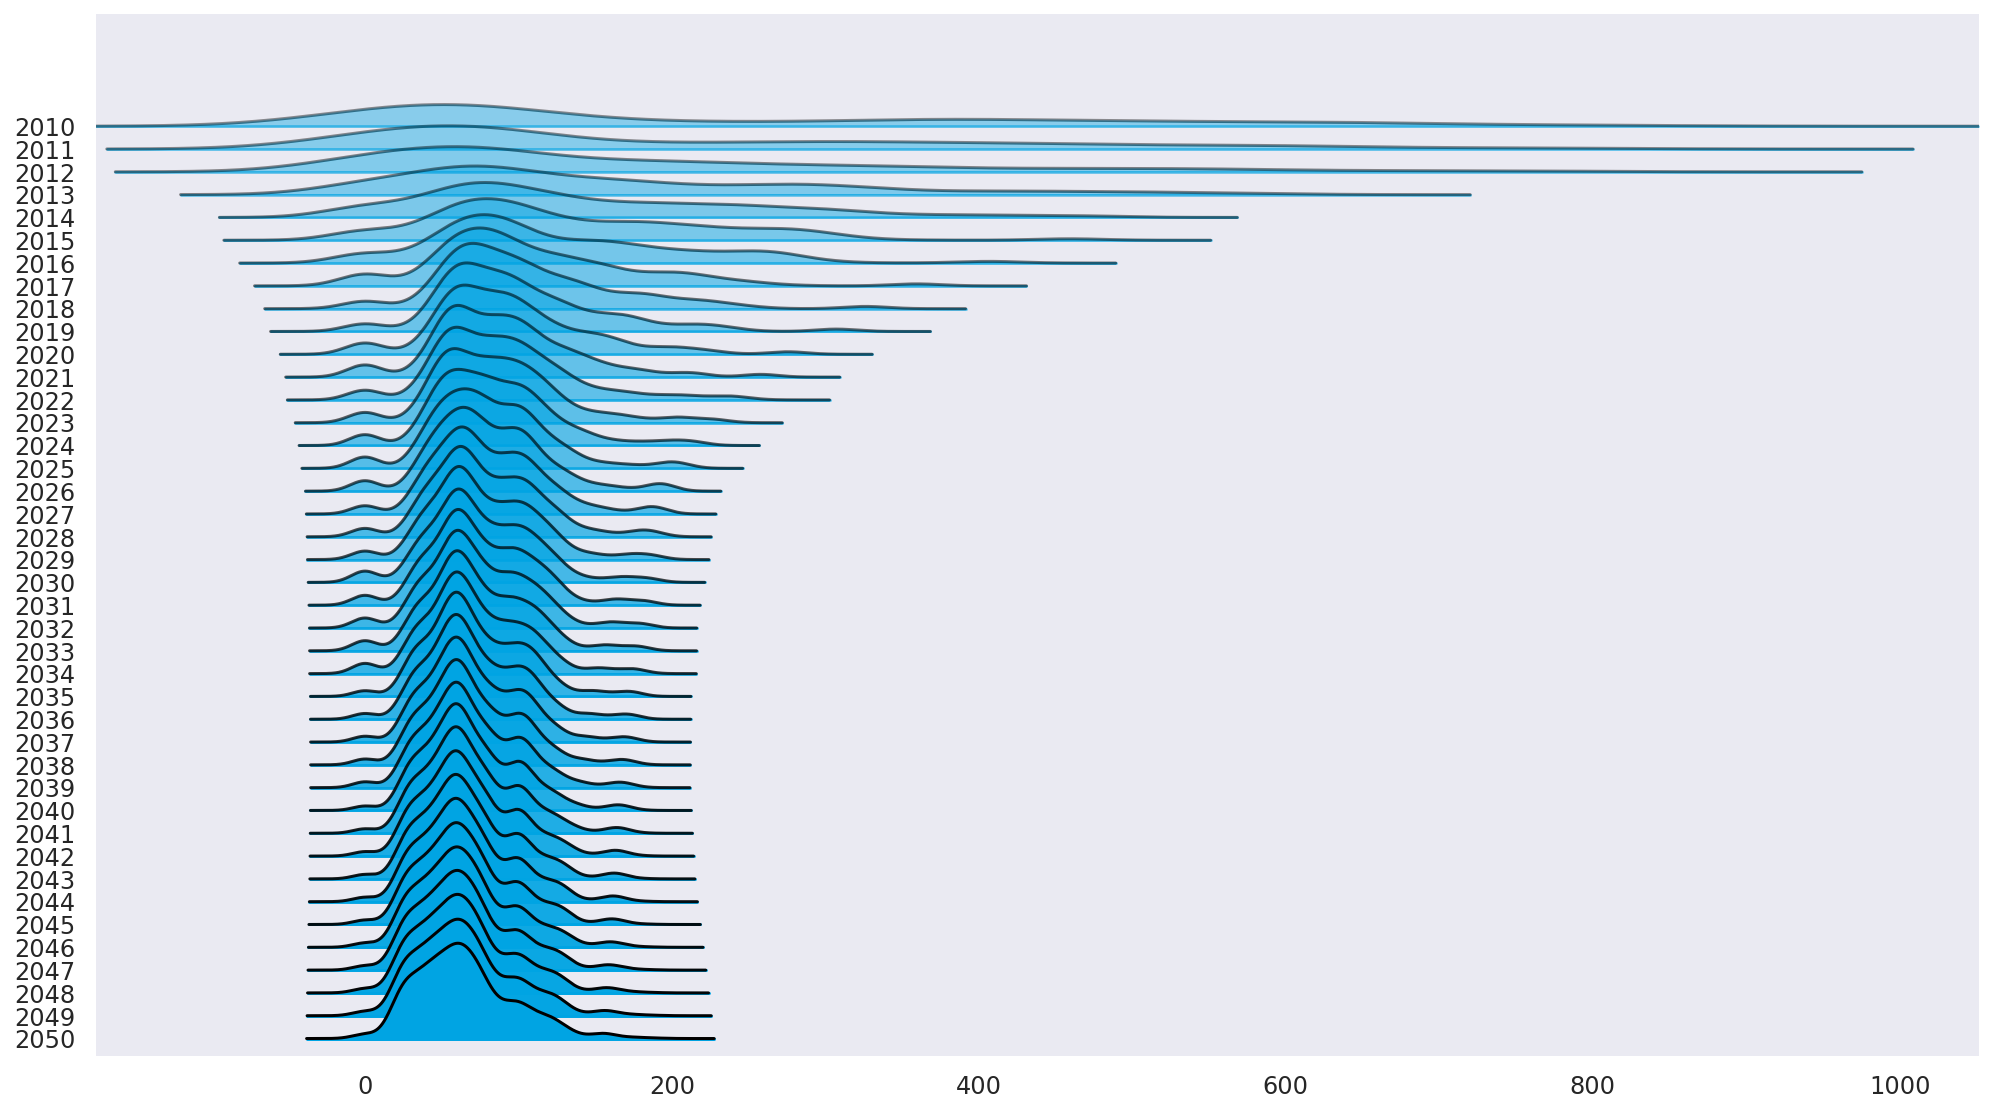

In [10]:
fig, axes = jp.joyplot(df, by="Year",column="LCOE (USD)", range_style="own", fade=True)

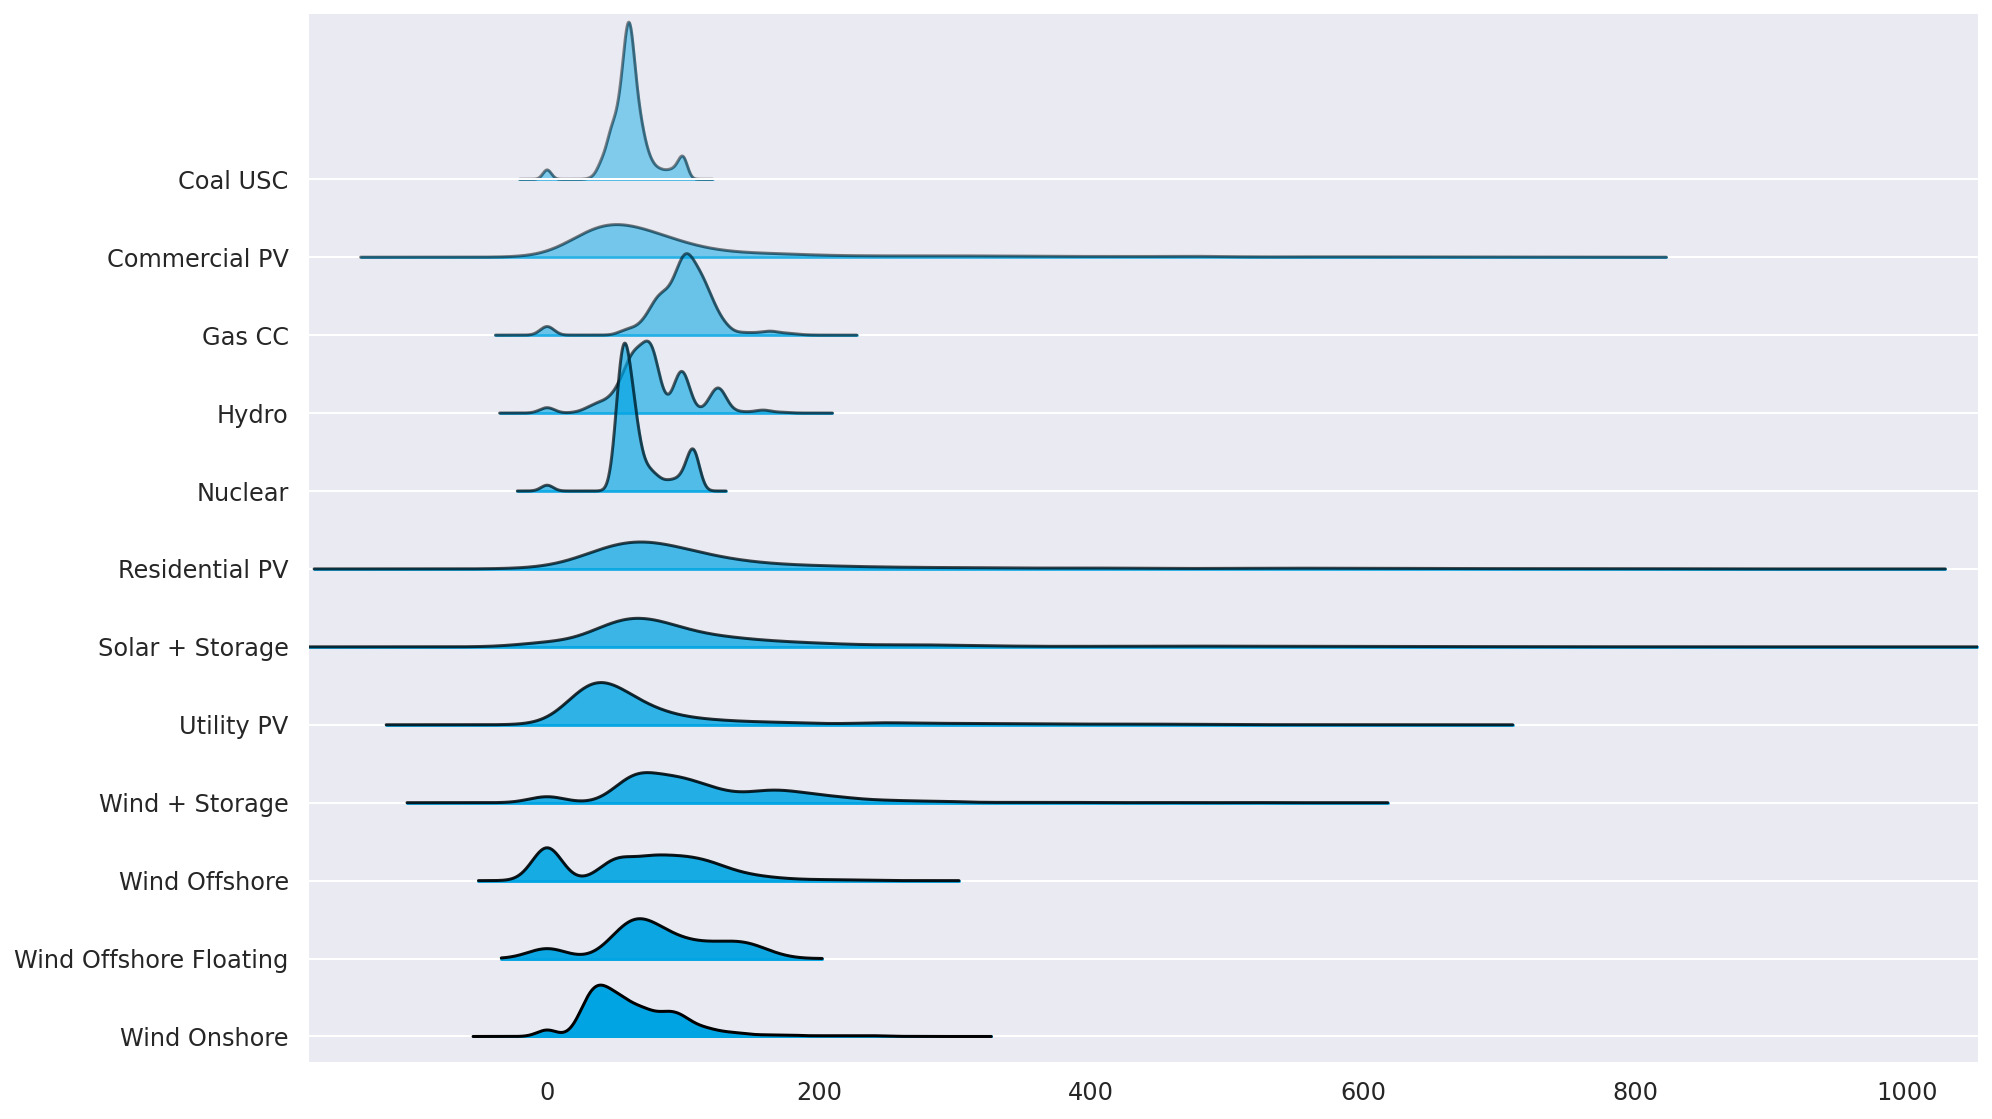

In [11]:
fig, axes = jp.joyplot(df, by="Technology",column="LCOE (USD)",grid="y", fade=True, figsize=(14,8),range_style="own")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


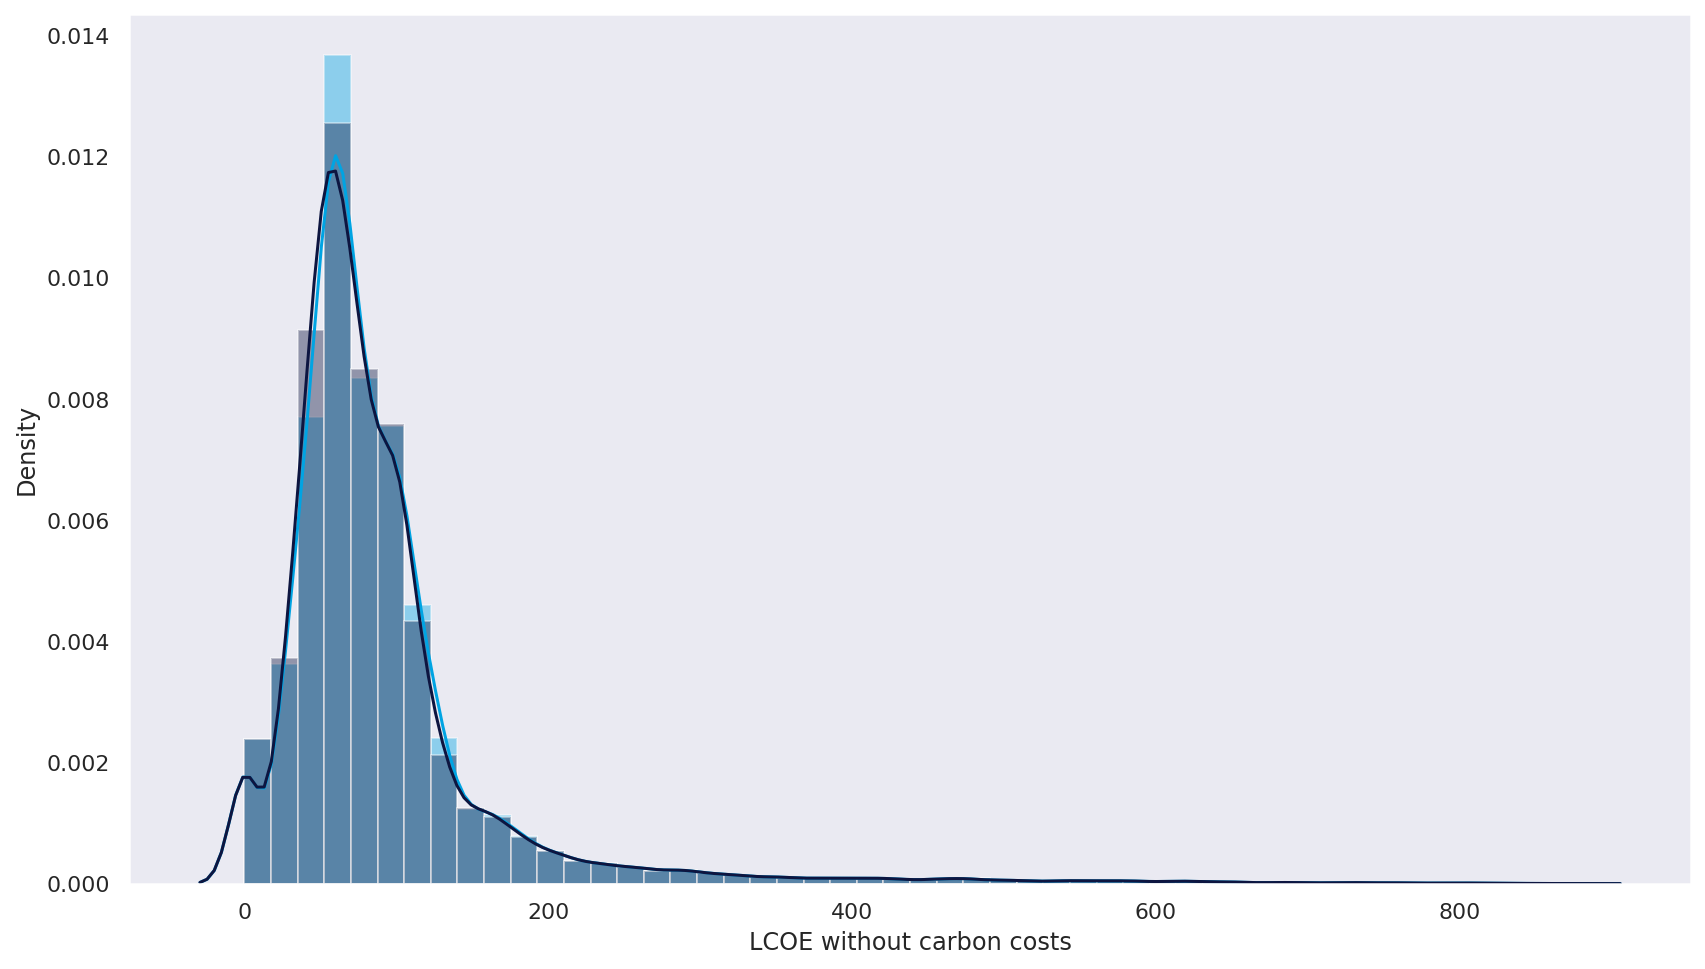

In [12]:
sns.distplot(df["LCOE (USD)"])
sns.distplot(df["LCOE without carbon costs"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


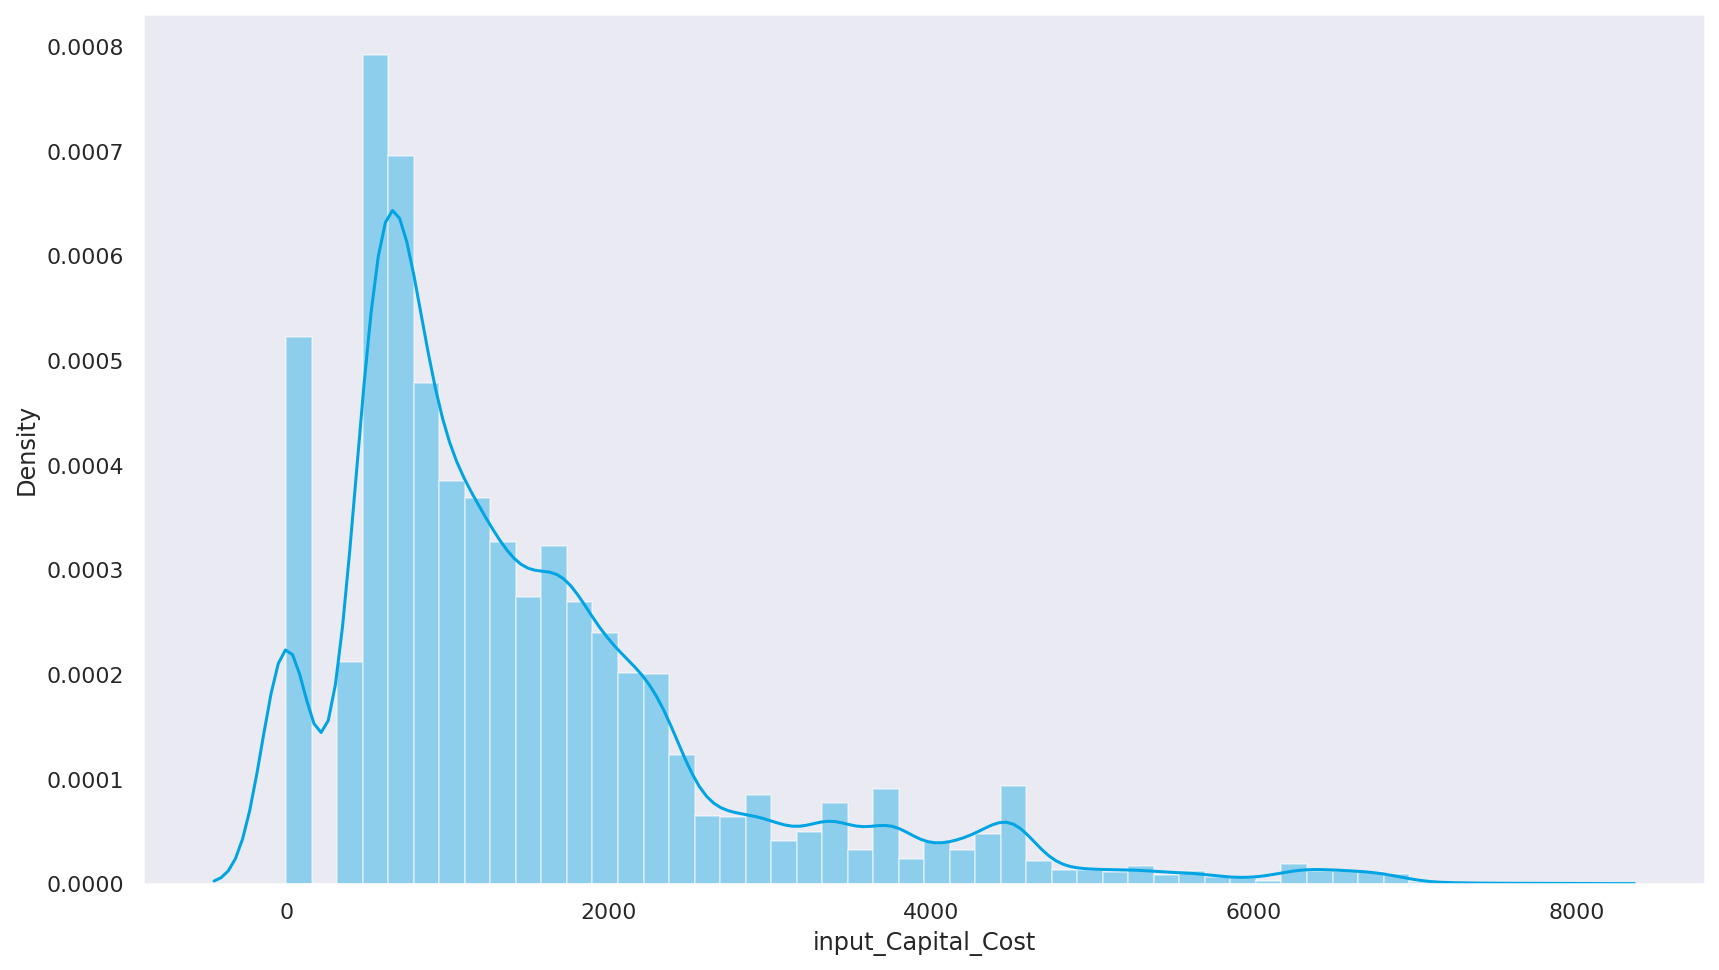

In [13]:
sns.distplot(df["input_Capital_Cost"]) 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


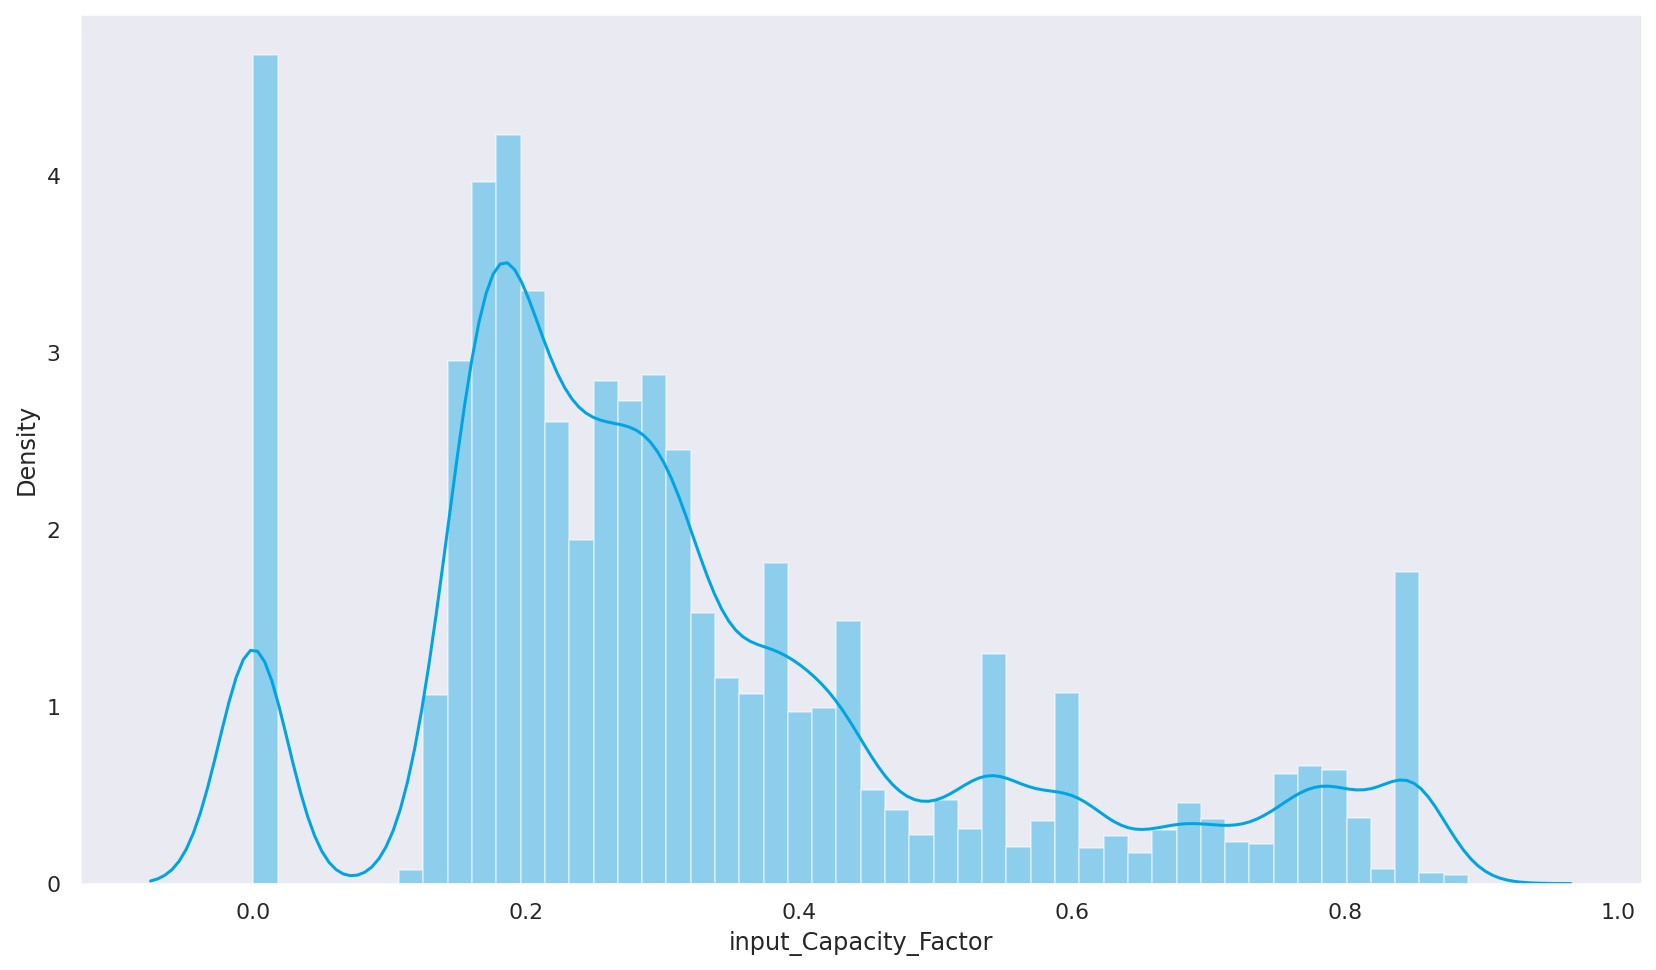

In [14]:
sns.distplot(df["input_Capacity_Factor"]) 

In [15]:
correlation = df.corr()

In [16]:
mask = np.triu(np.ones_like(correlation, dtype=bool))

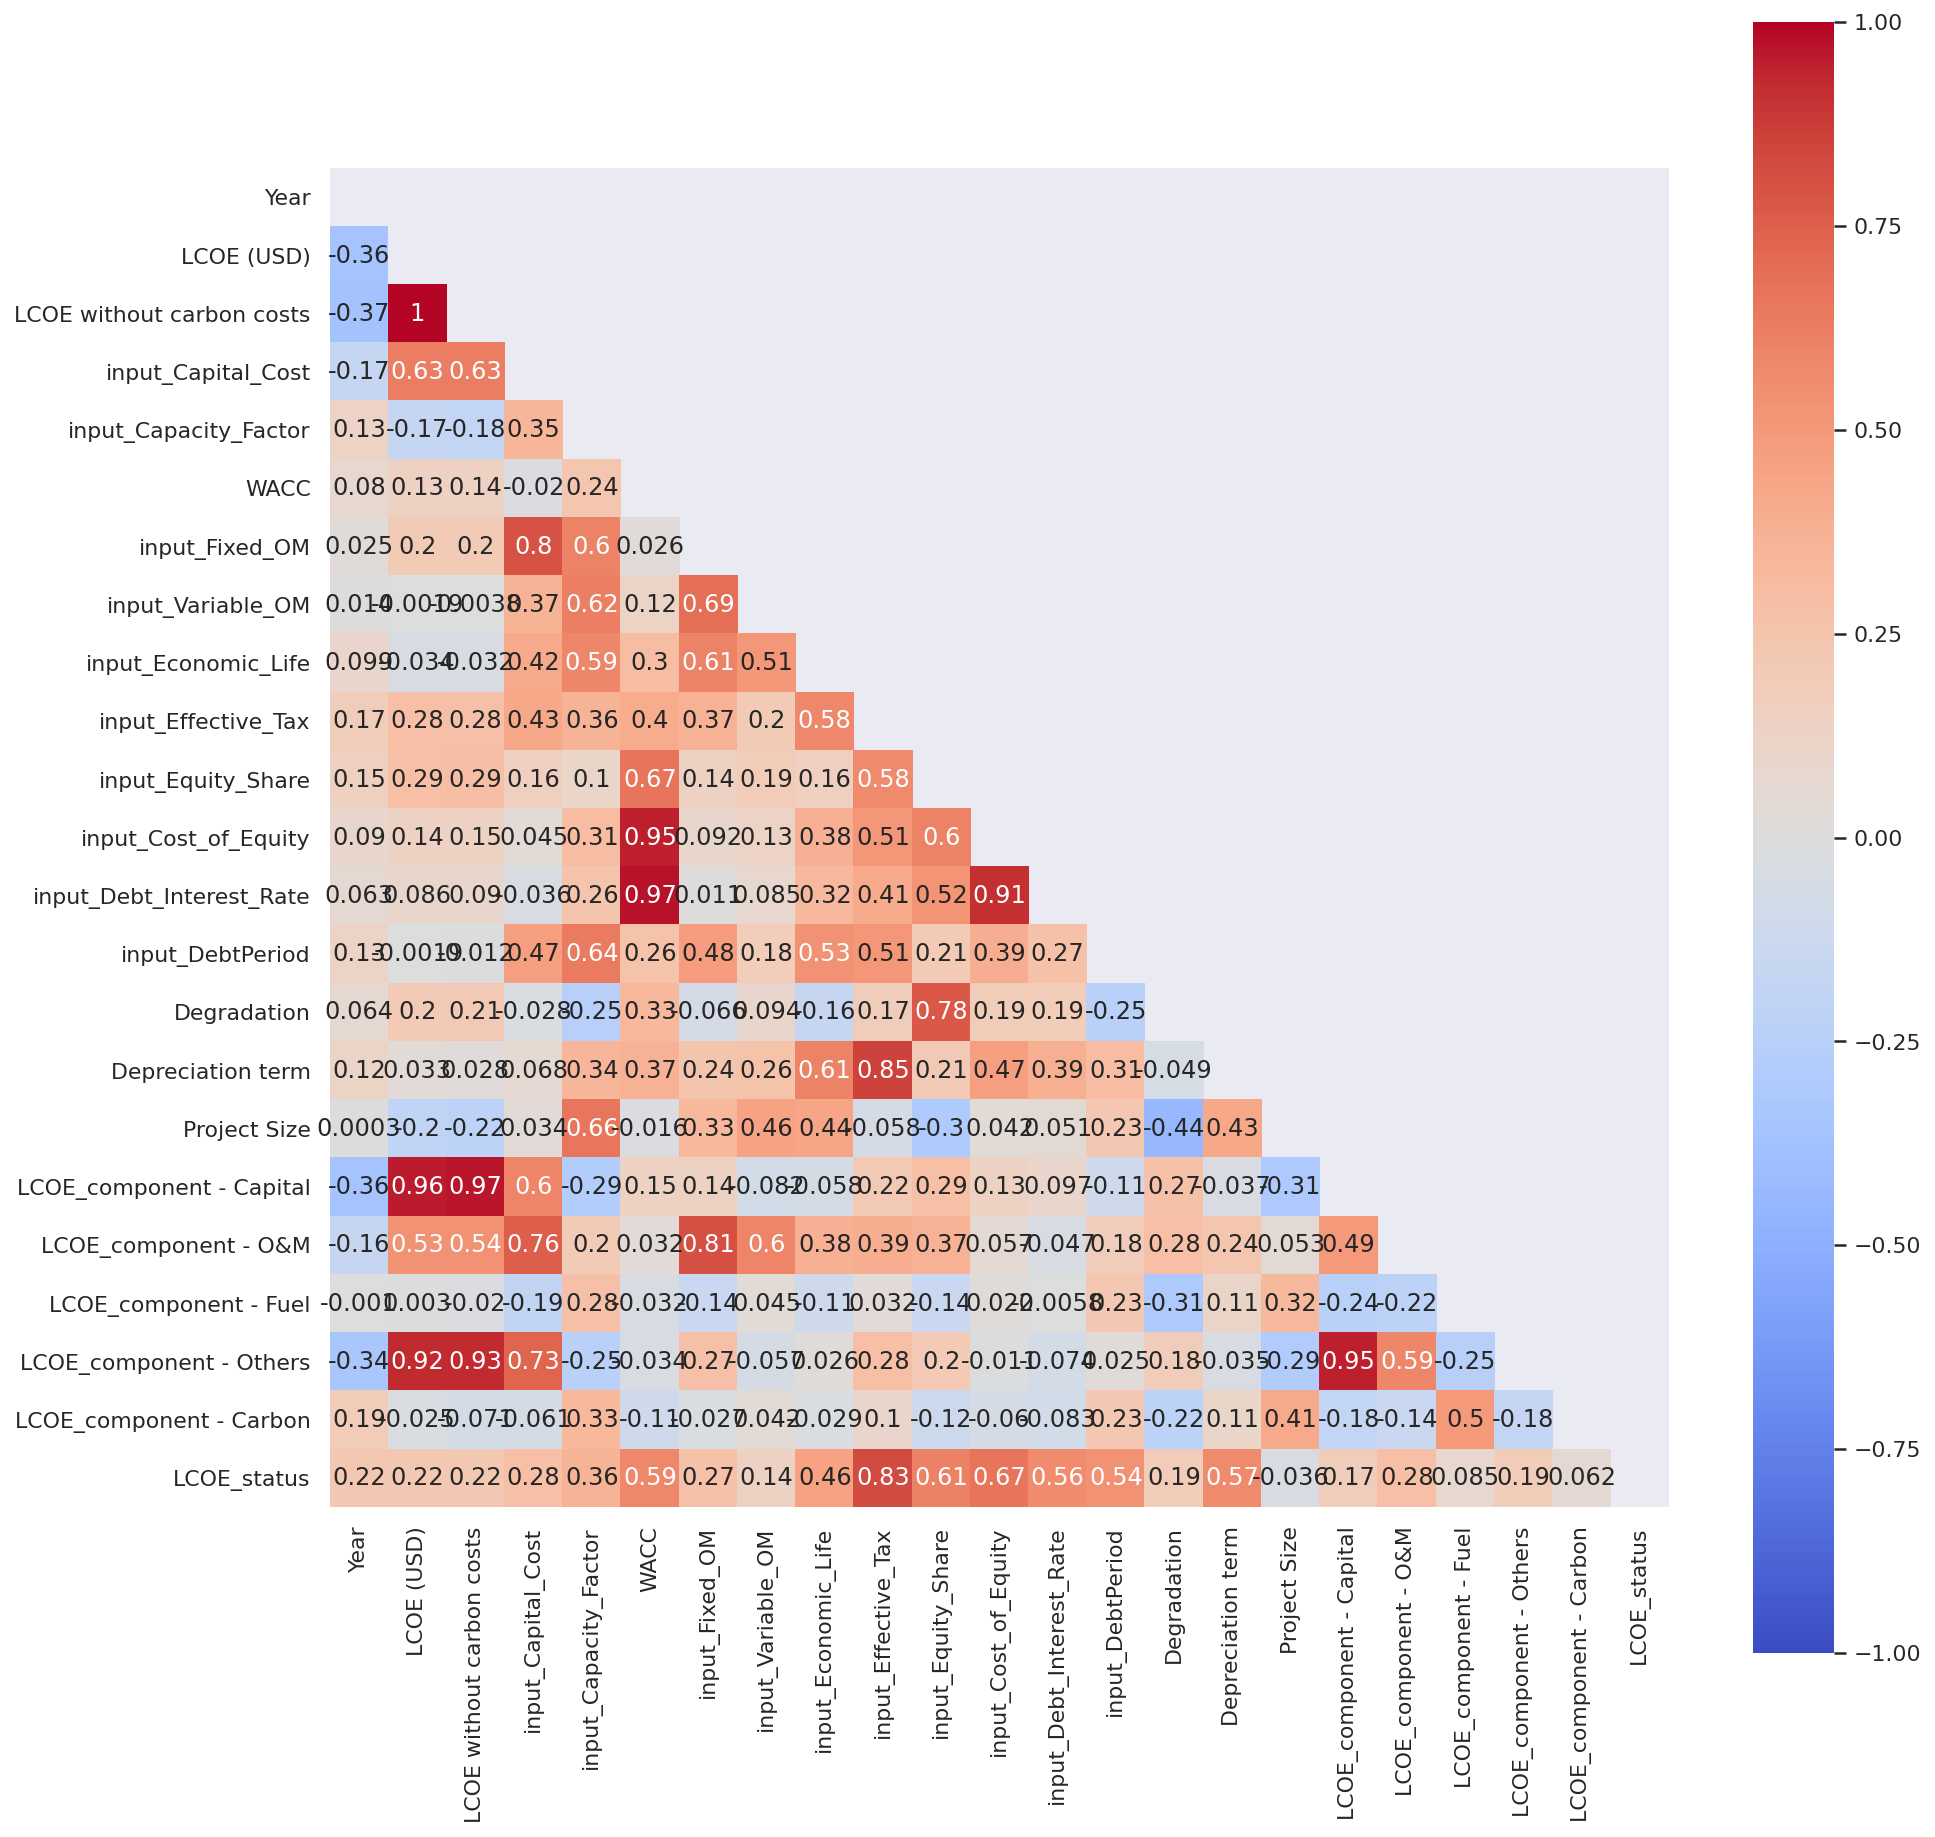

In [17]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlation.style.background_gradient(cmap='coolwarm').set_precision(2)
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlation, annot = True, cmap  = 'coolwarm', vmax = 1, vmin = -1, mask=mask,square=True)

In [18]:
df2=df[["LCOE (USD)", "LCOE without carbon costs",
        "input_Capacity_Factor","input_Capital_Cost","input_Equity_Share","input_Effective_Tax",
        "Degradation","input_Fixed_OM","input_Cost_of_Equity"]]

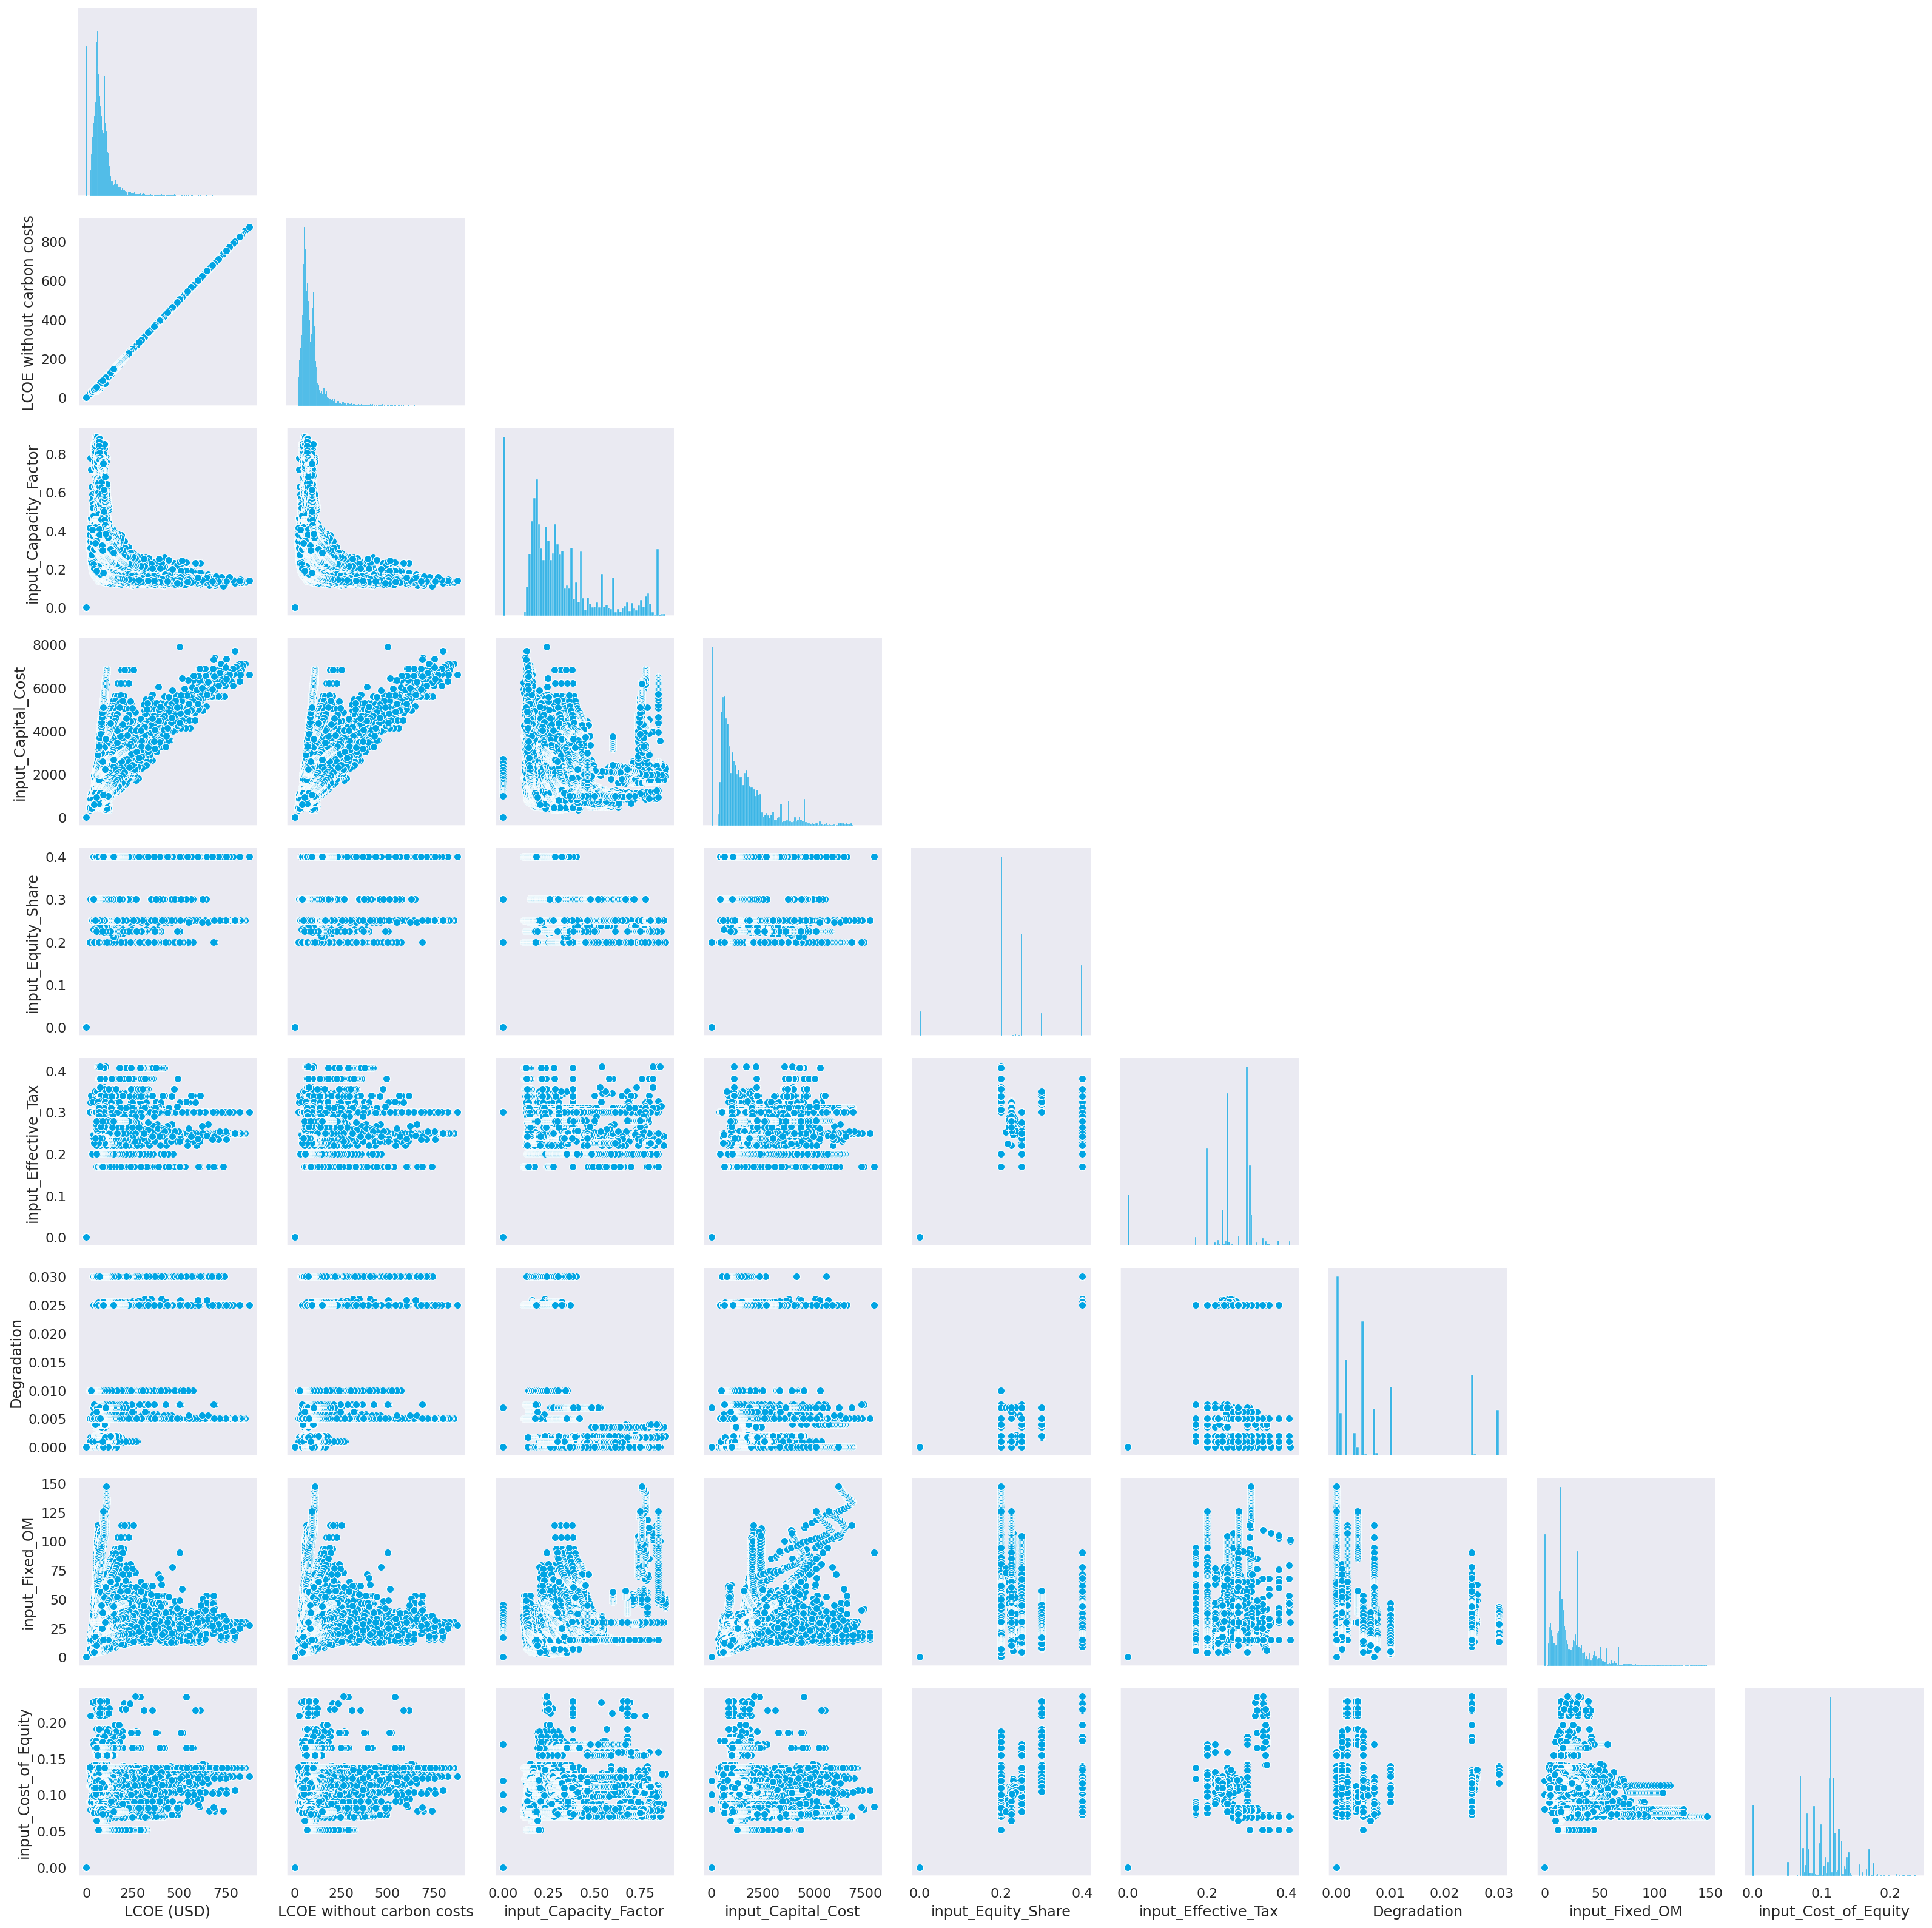

In [19]:
sns.pairplot(df2,corner=True)

In [20]:
##import stats model

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
#removing zero rows before taking the log for OLS modeling

In [23]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
LCOE (USD),39001.0,91.247041,80.584170,0.0,53.170000,72.300,103.740000,876.430000
LCOE without carbon costs,39001.0,90.099558,80.759671,0.0,51.250000,70.920,102.300000,876.430000
input_Capacity_Factor,40760.0,0.319034,0.210024,0.0,0.181298,0.270,0.400729,0.890000
input_Capital_Cost,40760.0,1487.881054,1247.016661,0.0,644.210000,1136.165,1962.270000,7910.610000
input_Equity_Share,40760.0,0.241447,0.094270,0.0,0.200000,0.200,0.250000,0.400000
input_Effective_Tax,26323.0,0.250083,0.081911,0.0,0.240000,0.250,0.300000,0.410000
Degradation,40760.0,0.007502,0.009410,0.0,0.001000,0.005,0.010000,0.030000
input_Fixed_OM,40760.0,24.122125,21.353893,0.0,12.330000,17.150,30.000000,147.320000
input_Cost_of_Equity,40760.0,0.101439,0.036276,0.0,0.081750,0.112,0.116370,0.236583


In [24]:
df3=df2[df2['LCOE (USD)'] != 0]

In [25]:
df3=df2[df2['LCOE without carbon costs'] != 0]

In [26]:
df3=df2[df2['input_Capital_Cost'] != 0]

In [27]:
df3=df2[df2['input_Equity_Share'] != 0]

In [28]:
df3=df2[df2['input_Effective_Tax'] != 0]

In [29]:
df3=df2[df2['input_Capacity_Factor'] != 0]

In [30]:
df3=df2[df2['Degradation'] != 0]

In [31]:
df3=df2[df2['input_Fixed_OM'] != 0]

In [32]:
df3=df2[df2['input_Cost_of_Equity'] != 0]

In [33]:
#non-zero removed

In [34]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
LCOE (USD),37365.0,95.242228,79.985137,17.440,55.350000,74.4900,105.39000,876.430000
LCOE without carbon costs,37365.0,94.044504,80.228975,17.440,53.240000,72.9700,103.86000,876.430000
input_Capacity_Factor,38291.0,0.339605,0.199921,0.000,0.192912,0.2800,0.42000,0.890000
input_Capital_Cost,38291.0,1583.819481,1226.119718,0.000,703.080000,1216.2300,2025.30000,7910.610000
input_Equity_Share,38291.0,0.257016,0.073881,0.200,0.200000,0.2500,0.25000,0.400000
input_Effective_Tax,24408.0,0.269704,0.044088,0.170,0.250000,0.2781,0.30000,0.410000
Degradation,38291.0,0.007986,0.009508,0.000,0.001000,0.0050,0.01000,0.030000
input_Fixed_OM,38291.0,25.677517,21.105733,0.000,13.940000,18.2800,30.74125,147.320000
input_Cost_of_Equity,38291.0,0.107980,0.026353,0.052,0.090000,0.1120,0.11637,0.236583


In [35]:
df3["log_LCOE"]=np.log(df3["LCOE (USD)"])
df3["log_Capital_Cost"]=np.log(df3["input_Capital_Cost"])
df3["log_Equity_Share"]=np.log(df3["input_Equity_Share"])
df3["log_CF"]=np.log(df3["input_Capacity_Factor"])
df3["log_Tax"]=np.log(df3["input_Effective_Tax"])
df3["log_Degradation"]=np.log(df3["Degradation"])
df3["log_Fixed_OM"]=np.log(df3["input_Fixed_OM"])
df3["log_COE"]=np.log(df3["input_Cost_of_Equity"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWit

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


OverflowError: ignored

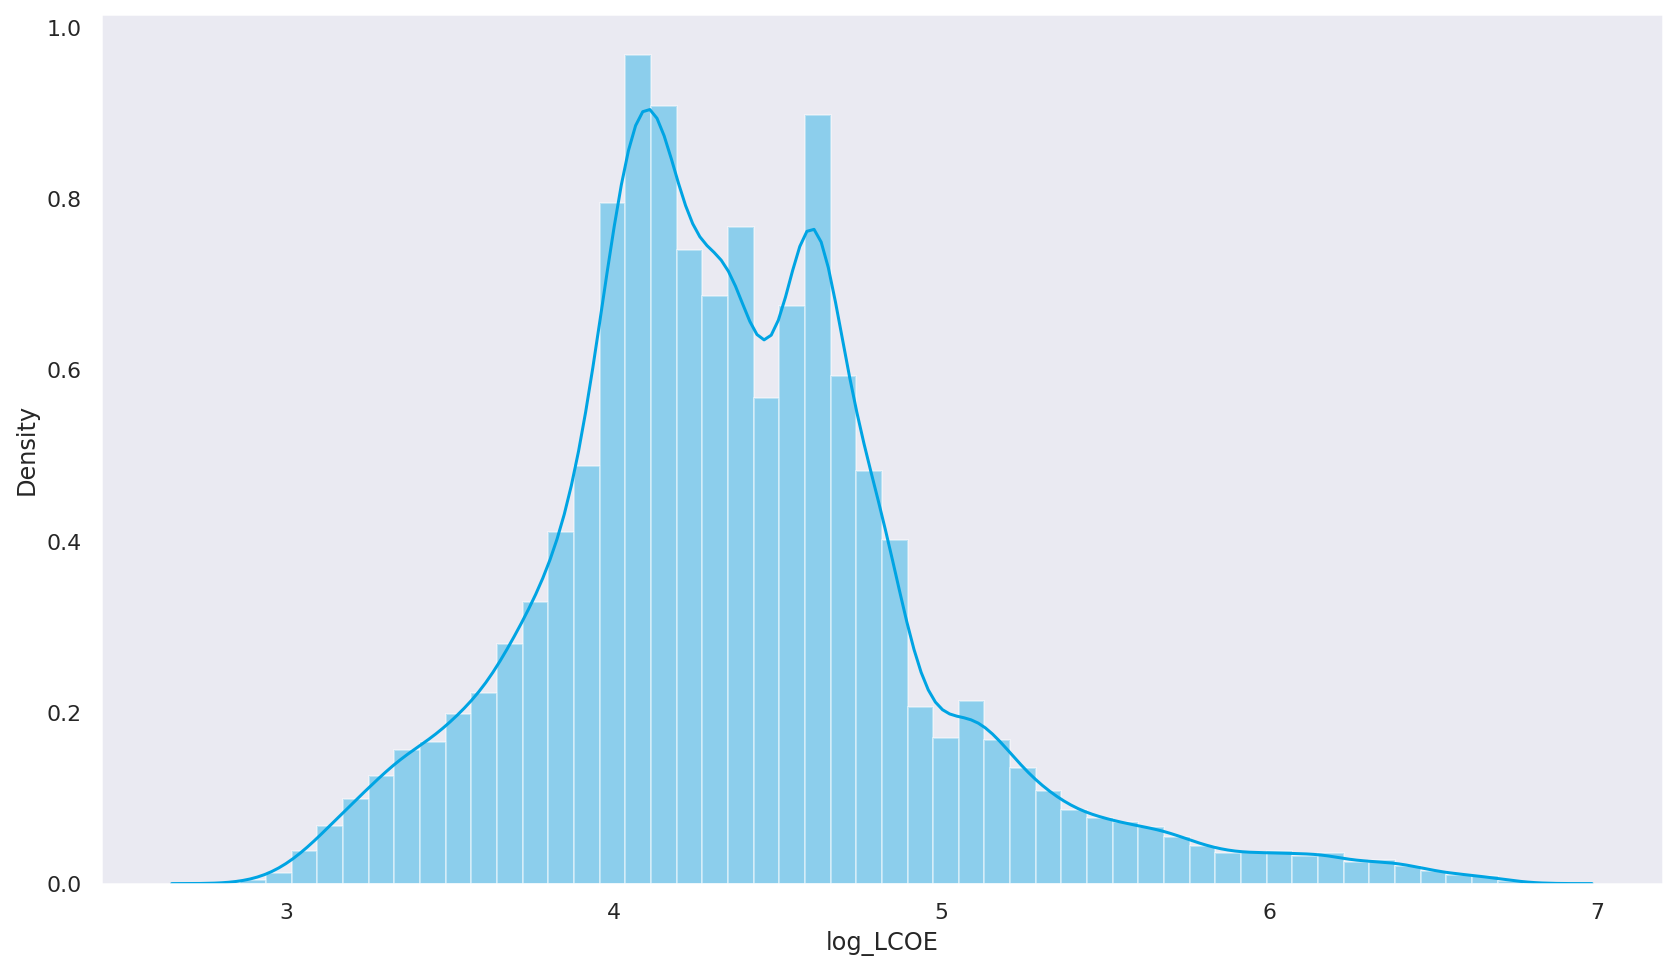

In [37]:
sns.distplot(df3["log_LCOE"])
sns.distplot(df3["log_Capital_Cost"])
sns.distplot(df3["log_Equity_Share"])
sns.distplot(df3["log_CF"])

#sns.distplot(df3["log_LCOE"])
#sns.distplot(df3["log_LCOE"])

In [38]:
formula1 = 'log_LCOE ~ log_Capital_Cost + log_Equity_Share + log_CF + log_Tax + log_Fixed_OM + log_COE - 1'
linear_areas_only = smf.ols(formula=formula1, data=df3).fit()
linear_areas_only.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               log_LCOE   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.035e+06
Date:                Tue, 05 Jan 2021   Prob (F-statistic):                        0.00
Time:                        15:01:59   Log-Likelihood:                         -3784.2
No. Observations:               24384   AIC:                                      7580.
Df Residuals:                   24378   BIC:                                      7629.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
log_Capital_Cost     0.8271      0.005    163.254      0.000       0.817       0.837
log_Equity_Share     0.5295      0.009     58.664      0.000       0.512       0.547
log_CF              -0.4634      0.004   -103.918      0.000      -0.472      -0.455
log_Tax              0.2451      0.009     27.096      0.000       0.227       0.263
log_Fixed_OM        -0.1708      0.006    -28.179      0.000      -0.183      -0.159
log_COE              0.2556      0.007     35.100      0.000       0.241       0.270
==============================================================================
Omnibus:                     2338.206   Durbin-Watson:                   0.556
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3225.758
Skew:                           0.780   Prob(JB):                         0.00
Kurtosis:                       3.861   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#fig = sm.graphics.plot_regress_exog(formula1, 'points', fig=fig)
